# create bathymetry map

In [9]:
install.packages('mapproj')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [ ]:
library(ggplot2)
library(mapdata)
library(marmap)

In [33]:
# get bathymetry data
b = getNOAA.bathy(lon1 = -68, lon2 = -63, lat1 = 9, lat2 = 13, 
                  resolution = 1)
## Querying NOAA database ...
## This may take seconds to minutes, depending on grid size
## Building bathy matrix ...

# make a simple track line
lin = data.frame(
  lon = c(-65.17536, -65.37423, -65.64541, -66.06122, -66.15161),  
  lat = c(43.30837, 42.94679, 42.87448, 42.92871, 42.72985)
)

# make a few points
pts = data.frame(
  lon = c(-64.67),
  lat = c(10.5)
)

# build a polygon (in this case the 'Roseway Basin Area To Be Avoided')
ply = data.frame(
  lon = c(-64.916667,-64.983333,-65.516667, -66.083333),
  lat = c(43.266667,  42.783333, 42.65, 42.866667)
)

Querying NOAA database ...
This may take seconds to minutes, depending on grid size
Building bathy matrix ...


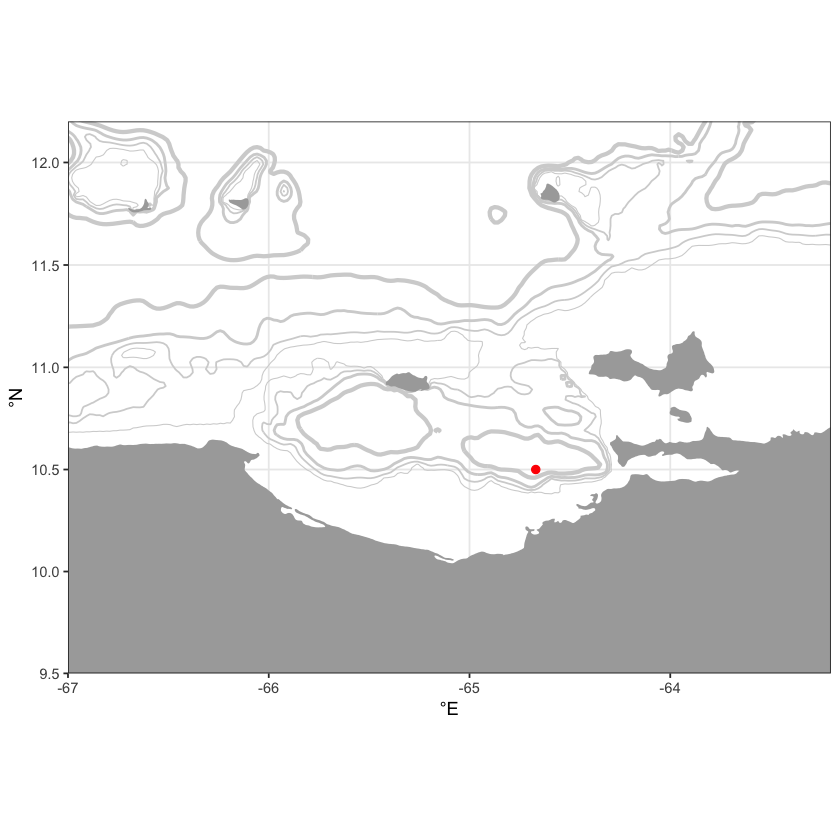

In [38]:
library(ggplot2)
library(mapdata)

# convert bathymetry to data frame
bf = fortify.bathy(b)

# get regional polygons
reg = map_data("world2Hires")
reg = subset(reg, region %in% c('Venezuela'))

# convert lat longs
reg$long = (360 - reg$long)*-1

# set map limits
lons = c(-67, -63.2)
lats = c(9.5, 12.2)

# make plot
ggplot()+
  
  # add 100m contour
  geom_contour(data = bf, 
               aes(x=x, y=y, z=z),
               breaks=c(-100),
               size=c(0.3),
               colour="lightgrey")+
  
  # add 250m contour
  geom_contour(data = bf, 
               aes(x=x, y=y, z=z),
               breaks=c(-250),
               size=c(0.5),
               colour="lightgrey")+

  # add 500m contour
  geom_contour(data = bf, 
               aes(x=x, y=y, z=z),
               breaks=c(-500),
               size=c(0.8),
               colour="lightgrey")+

 # add 1000m contour
  geom_contour(data = bf, 
               aes(x=x, y=y, z=z),
               breaks=c(-1000),
               size=c(1.2),
               colour="lightgrey")+



  
  # add coastline
  geom_polygon(data = reg, aes(x = long, y = lat, group = group), 
               fill = "darkgrey", color = NA) + 
  
  # add polygon
  geom_polygon(data = ply, aes(x = lon, y = lat),
               color = "black", alpha = 0.3) +
  
  # add line
  geom_path(data = lin, aes(x = lon, y = lat),
            colour = "black", alpha = 1, size=0.3)+
  
  # add points
  geom_point(data = pts, aes(x = lon, y = lat),
             colour = "red", fill = "red", 
             stroke = .5, size = 2, 
             alpha = 1, shape = 21)+
  
  # configure projection and plot domain
  coord_map(xlim = lons, ylim = lats)+
  
  # formatting
  ylab("°N")+xlab("°E")+
  theme_bw()

In [39]:
ggsave('PLOTS/BathyMap01.png', width=8, height= 8)